# Análisis Exploratorio de Datos (EDA)

# 1. Importar librerías necesarias

In [593]:
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from langdetect import detect

----

# 2. Carga de los datos del archivo csv

In [594]:
df_udemy = pd.read_csv('../data/udemy_2.csv')

---

# 3. Observar la estructura de los datos 

In [595]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8


In [596]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
 12  language             3678 non-null   object 
 13  rating               3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 377.3+ KB


---

# 4. Observar las columnas del df y hacer cambios, sí lo requieren

    4.1 Observar todas las columnas del df

In [597]:
df_udemy.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'language',
       'rating'],
      dtype='object')

    4.2 Observar y trabajar con la columna 'course_id'

In [598]:
# Observar los duplicados 'course_id'
df_udemy.duplicated().sum()

6

In [599]:
# Eliminar los duplicados de la columna 
df_udemy.drop_duplicates(inplace=True)

In [600]:
# reinicar los índices del df
df_udemy.reset_index(drop=True, inplace=True)

In [601]:
# Observar nuevamente los duplicados 'course_id'
df_udemy.duplicated().sum()

0

    4.2 Observar y trabajar con la columna 'language'

In [602]:
# Observar los valores que estan en la columna
df_udemy['language'].value_counts()

language
English       2035
NoData        1442
Português       39
Spanish         38
Español         38
日本語             28
Deutsch         17
Français        10
Arabic           9
Türkçe           4
Italiano         3
русский          3
Portuguese       2
Hindi            1
한국어              1
简体中文             1
Urdu             1
Name: count, dtype: int64

In [603]:
# Recorrer toda la columna 'course_title' identificando el idioma en que esta escrito cada curso, para después reemplazarlos en los valores NoData
def detect_language(title):
    try:
        return detect(title)
    except:
        return 'unknown'  # devuelve 'unknown' si no se puede detectar el idioma

# Aplicamos la función para los títulos de los cursos donde el idioma es 'NoData'
df_udemy.loc[df_udemy['language'] == 'NoData', 'language'] = df_udemy.loc[df_udemy['language'] == 'NoData', 'course_title'].apply(detect_language)

In [604]:
# Crear un diccionario para identificar las abreviaciones en que idioma pertenecen 
language_mapping = {
    "es": "Spanish",
    "Español": "Spanish",
    "en": "English",
    "Português": "Portuguese",
    "pt": "Portuguese",
    "Deutsch": "German",
    "de": "German",
    "Français": "French",
    "fr": "French",
    "日本語": "Japanese",
    "it": "Italian",
    "Italiano": "Italian",
    "ca": "Catalan",
    "tl": "Tagalog",
    "no": "Norwegian",
    "Arabic": "Arabic",
    "ar": "Arabic",
    "da": "Danish",
    "ro": "Romanian",
    "nl": "Dutch",
    "et": "Estonian",
    "Türkçe": "Turkish",
    "русский": "Russian",
    "zh-cn": "Chinese",
    "简体中文": "Chinese",
    "한국어": "Korean",
    "ja": "Japanese",
    "sv": "Swedish",
    "af": "Afrikaans",
    "th": "Thai",
    "Hindi": "Hindi",
    "tr": "Turkish",
    "pl": "Polish",
    "Urdu": "Urdu",
    "so": "Somalian",
    "id": "indonesian"
}

# Pasar todas las abreviaciones e idiomas en un solo registro que en este caso va a ser en inglés 
df_udemy['language'] = df_udemy['language'].replace(language_mapping)

In [605]:
# Observar nuevamente los valores que esta en la columna
df_udemy['language'].value_counts()

language
English       3237
Spanish        143
Portuguese      64
German          54
Japanese        30
French          24
Catalan         22
Italian         21
Arabic          12
Norwegian       10
Tagalog          9
Dutch            7
Romanian         7
Turkish          5
Danish           4
Chinese          4
Afrikaans        4
Russian          3
Swedish          3
Thai             2
Estonian         2
Hindi            1
indonesian       1
Polish           1
Korean           1
Urdu             1
Name: count, dtype: int64

---

# 5. Eliminar las columnas innecesarias

    Eliminar la columna 'url'

In [606]:
df_udemy.drop('url', axis=1, inplace=True)

---

# 6. Observar los valores nulos

In [607]:
df_udemy.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
language               0
rating                 0
dtype: int64

---

# 7. Convertir la columna 'published_timestamp' de tipo objeto a tipo fecha y hora, después solo obtener solo la fecha

In [608]:
df_udemy['published_timestamp'] = pd.to_datetime(df_udemy['published_timestamp'])

In [609]:
df_udemy['published_timestamp'] = df_udemy['published_timestamp'].dt.date

---

# 8. Observar una muestra de los datos del df

In [610]:
df_udemy.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,English,3.6
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,English,4.5
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance,English,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30,Business Finance,English,4.5
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance,English,4.8


---

# 9. Cambiar características de la columna 'rating'

    9.1 Pasar la columna a tipo string para reemplazar las comas

In [611]:
df_udemy['rating'] = df_udemy['rating'].astype(str)

    9.2 Cambiar las comas por puntos

In [612]:
df_udemy['rating'] = df_udemy['rating'].str.replace(',', '.')

    9.3 Reemplazar 'NoData' por NaN

In [613]:
df_udemy['rating'].replace('NoData', np.nan, inplace=True)

    9.4 Convertir a tipo flotante

In [614]:
df_udemy['rating'] = df_udemy['rating'].astype(float)

    9.5 Reemplazar NaN por la media de la columna

In [615]:
df_udemy['rating'].fillna(df_udemy['rating'].mean(), inplace=True)

---

# 10. Visualización de la distribución de las variables objetivo del proyecto

    10.1. Distribución del precio en relación a todos los cursos

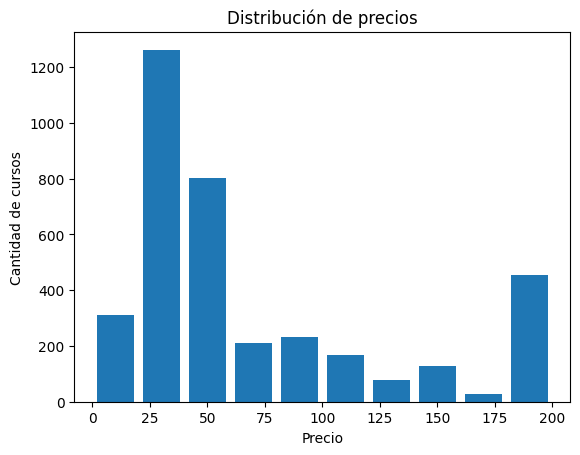

In [616]:
# Histograma de precios
df_udemy['price'].plot(kind='hist', rwidth=0.8)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Cantidad de cursos')
plt.show()

    Resultado: La mayoría de los cursos se encuentran en un rango de precios entre 25 y 50 dolares 

---

    10.2. Distribución de los temas con respecto a todos los cursos

<Axes: xlabel='subject', ylabel='count'>

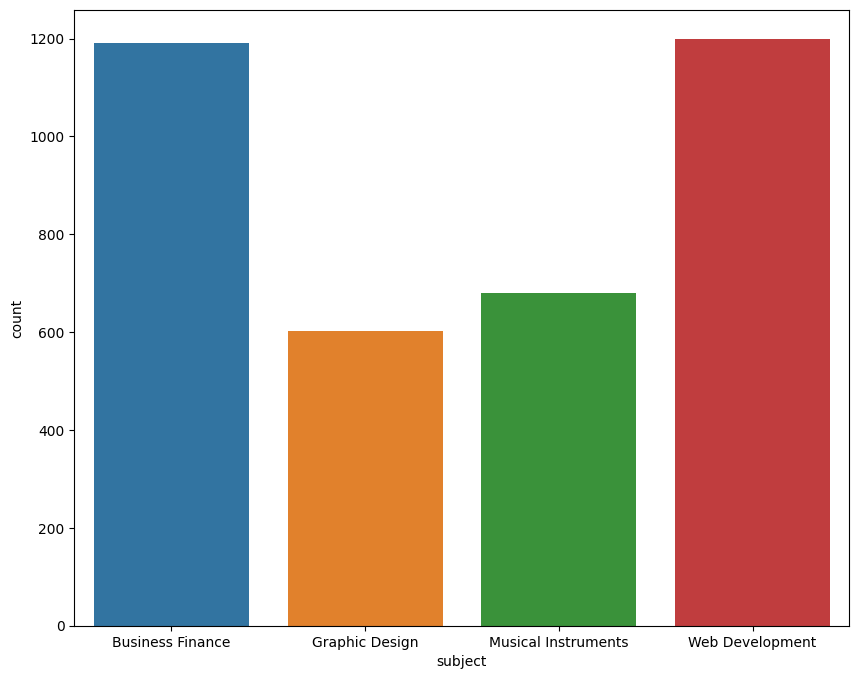

In [617]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_udemy, x='subject')

    Resultado: La mayoría de los estudiantes se intersan más por las 'Business Finance' y el 'web Development'

---

    10.3. Distribución de los niveles de los cursos respecto a la cantidad total de los cursos
    

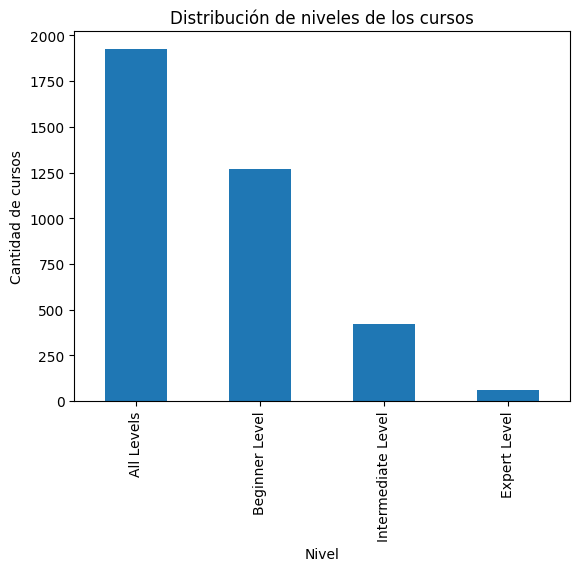

In [618]:
# Gráfico de barras de niveles de los cursos
df_udemy['level'].value_counts().plot(kind='bar')
plt.title('Distribución de niveles de los cursos')
plt.xlabel('Nivel')
plt.ylabel('Cantidad de cursos')
plt.show()

    Resultado: La mayoría de los cursos son para todos los niveles, se necesitan más de nivel experto

---

      10.4. Distribución de los cursos entre pagos y gratis

In [619]:
df_udemy['is_paid'] = df_udemy['is_paid'].replace(True, "Pago")
df_udemy['is_paid'] = df_udemy['is_paid'].replace(False, "Gratis") 

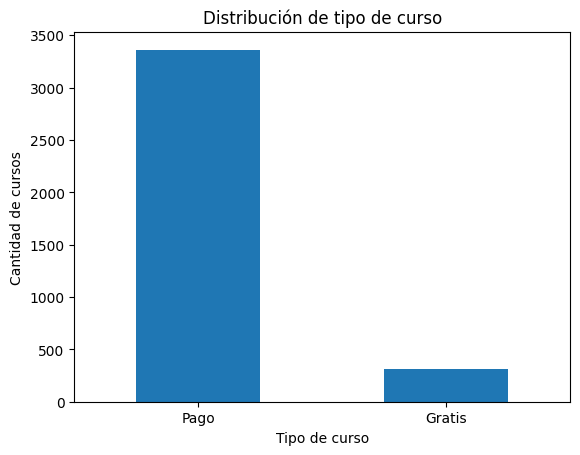

In [620]:
# Gráfico de barras de niveles de los cursos
ax = df_udemy['is_paid'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Pago', 'Gratis'], rotation=0)  # Rotar las etiquetas en el eje x
plt.title('Distribución de tipo de curso')
plt.xlabel('Tipo de curso')
plt.ylabel('Cantidad de cursos')
plt.show()  

    Resultado: la mayoría de los cursos que ofrece Udemy son de pago 

---

    10.5. Analizar si los cursos más caros atraen menos suscriptores.

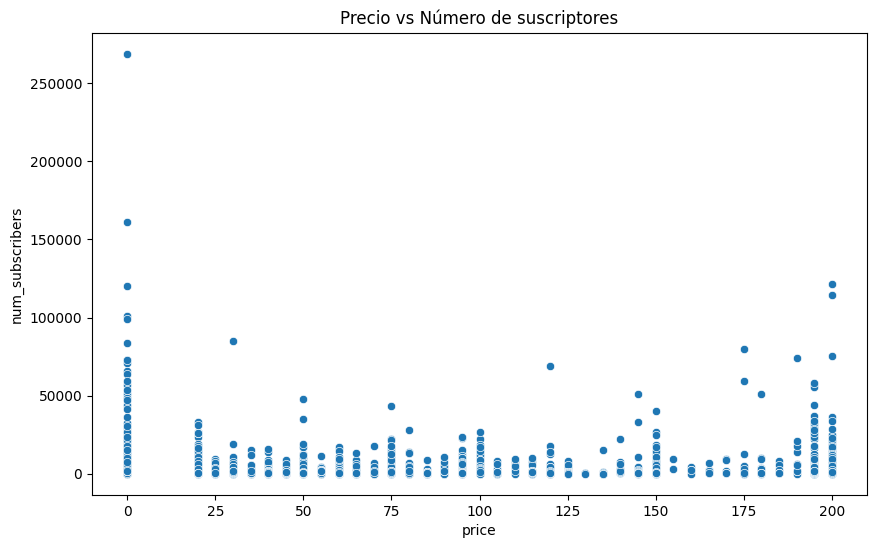

In [621]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_udemy, x='price', y='num_subscribers')
plt.title('Precio vs Número de suscriptores')
plt.show()

    Resultado: El precio del curso no afecta el número de suscriptores

---

    10.6. Observar si los cursos con más reseñas tienden a tener calificaciones más altas.

In [622]:
# ordenar la columna 'rating'
df_sorted = df_udemy.sort_values('rating')

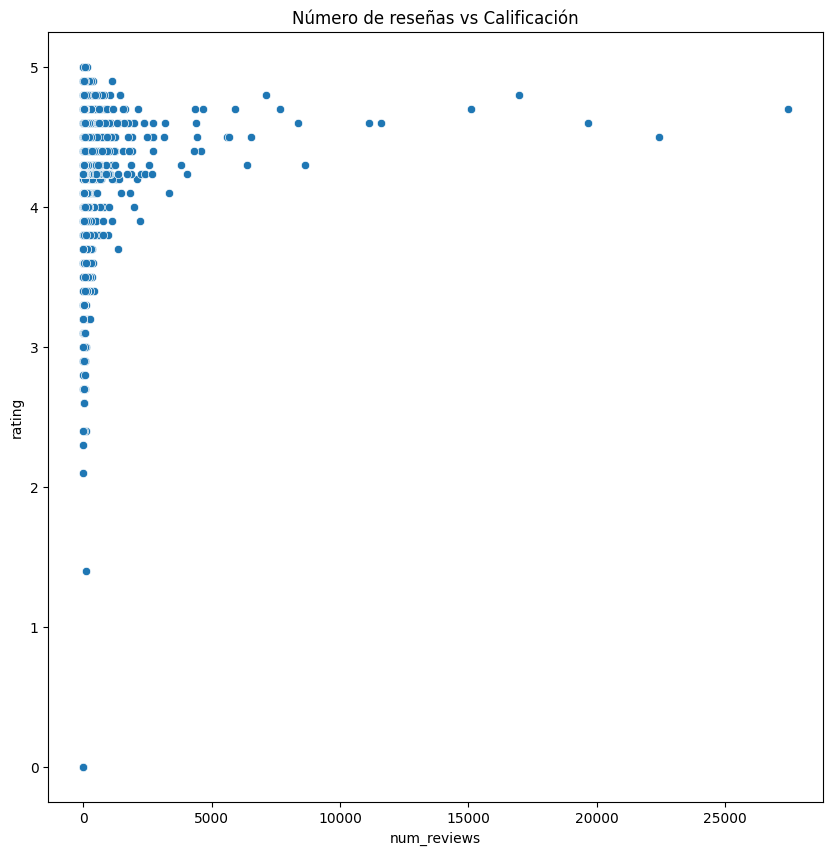

In [623]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_sorted, x='num_reviews', y='rating')
plt.title('Número de reseñas vs Calificación')
plt.show()

    Resultado: Se observa una tendencia: los cursos con más reseñas obtienen calificaciones más altas

---

    10.7. Precio vs. número de reseñas: Observar si el precio de los cursos afecta al número de reseñas

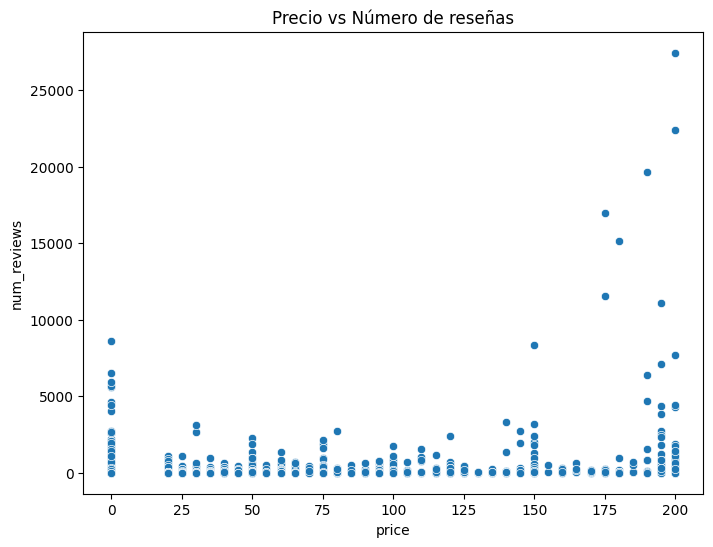

In [624]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_sorted, x='price', y='num_reviews')
plt.title('Precio vs Número de reseñas')
plt.show()

    Resultado: El precio del curso no afecta el número de reseñas

---

# 11. Mapa de calor (para observar correlaciones entre las variables) 

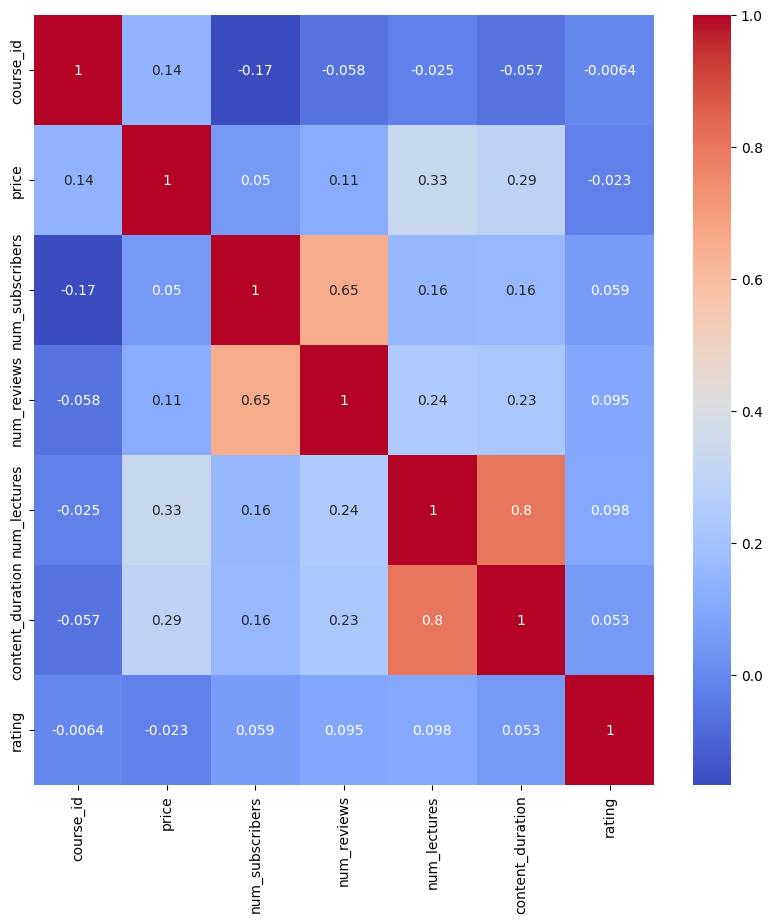

In [625]:
# Seleccionar solo las columnas numéricas
df_numeric = df_udemy.select_dtypes(include=['float64', 'int64'])

# calcular la correlación 
plt.figure(figsize=(10,10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

---

# 12. Nube de palabras con la columna 'course_title' 

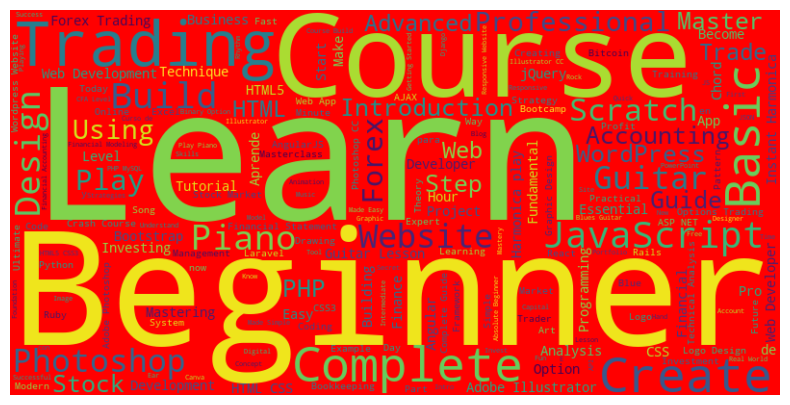

In [626]:
# Unir todos los títulos
titles = ' '.join(df_udemy['course_title'])

# Hacer una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(titles)

# Mostrar la nube de palabras de títulos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

---

 # 13. Analizar los posibles valores atípicos

In [627]:
df_udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,rating
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603,4.234614
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830,0.358326
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000,4.200000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000,4.234614
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000,4.400000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,5.000000


In [628]:
# Observar los posibles valores atípicos 
df_udemy[df_udemy['content_duration'] == 78.5]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
1653,978576,The Complete Figure Drawing Course HD,Pago,50,1323,136,225,Beginner Level,78.5,2016-10-11,Graphic Design,English,4.7


# 14. Observar los posibles valores atípicos para las columnas seleccionadas mediante un diagrama de cajas

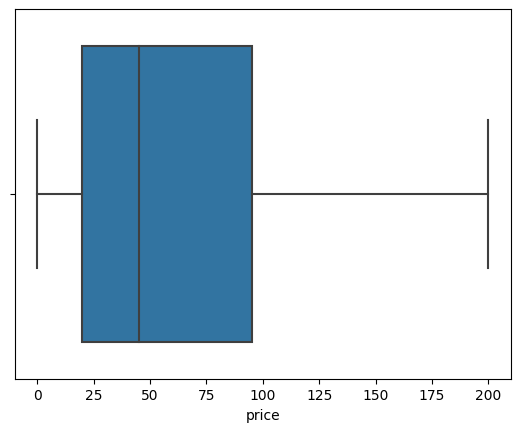

In [629]:
# Diagrama de cajas para la columna 
sns.boxplot(x=df_udemy['price'])
plt.show()

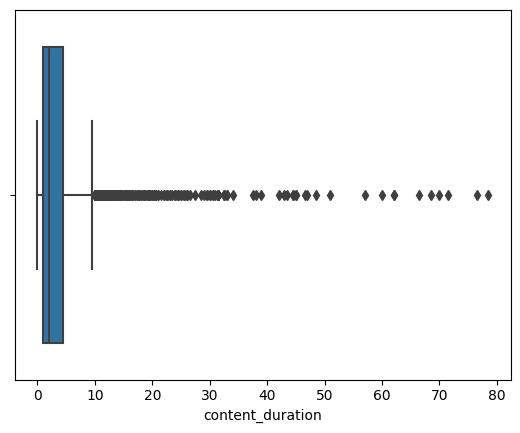

In [630]:
# Diagrama de cajas para la columna 
sns.boxplot(x=df_udemy['content_duration'])
plt.show()

---

# 15. Tendencia del número de cursos publicados por año en Udemy

In [631]:
# Obtener el año de la columna 'published_timestamp'
df_udemy['year_published'] = pd.to_datetime(df_udemy['published_timestamp']).dt.year

In [632]:
# Agrupar por el año y sumar el número de cursos
courses_per_year = df_udemy.groupby('year_published').size()

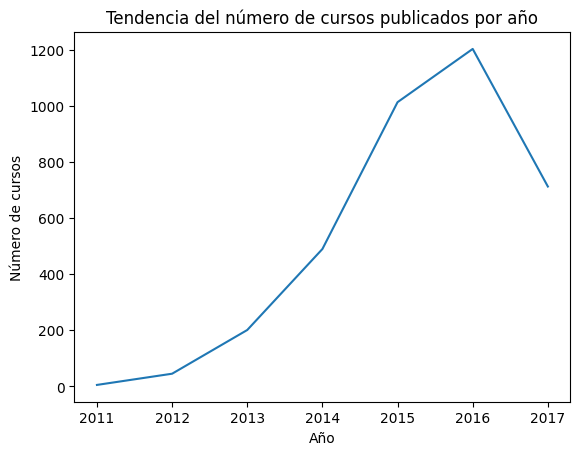

In [633]:
# Visualizar la tendencia por medio de una gráfica de líneas
courses_per_year.plot(kind='line')
plt.title('Tendencia del número de cursos publicados por año')
plt.xlabel('Año')
plt.ylabel('Número de cursos')
plt.show()


    Resultado: A partir de la visualización de la gráfica, podemos obervar que el número de cursos publicados en Udemy ha estado cambiando a lo largo del tiempo. Para tener una idea más clara de por qué esto está sucediendo, podemos considerar los siguientes aspectos:
    
    1. Demanda del mercado: El crecimiento inicial (2011-2016) puede indicar que Udemy estaba llenando un vacío en el mercado de la educación en línea, lo que llevó a un aumento en la demanda y, por lo tanto, a un aumento en la cantidad de cursos ofrecidos.

    2. Saturación del mercado: La pendiente descendente desde 2016 hasta 2017 podría indicar que el mercado comenzó a saturarse, posiblemente porque se cubrieron la mayoría de los temas populares, por lo que se publicaron menos cursos nuevos.

    3. Cambio de estrategia: La disminución en la cantidad de nuevos cursos podría ser el resultado de un cambio de estrategia de Udemy. Es posible que Udemy haya comenzado a centrarse más en mejorar la calidad de los cursos existentes en lugar de simplemente aumentar la cantidad de nuevos cursos.

---

# 16. Tendencia del precio promedio de los cursos por año en Udemy

In [634]:
# Obtener el precio promedio por año de la columna 'price'
average_price_per_year = df_udemy.groupby('year_published')['price'].mean()

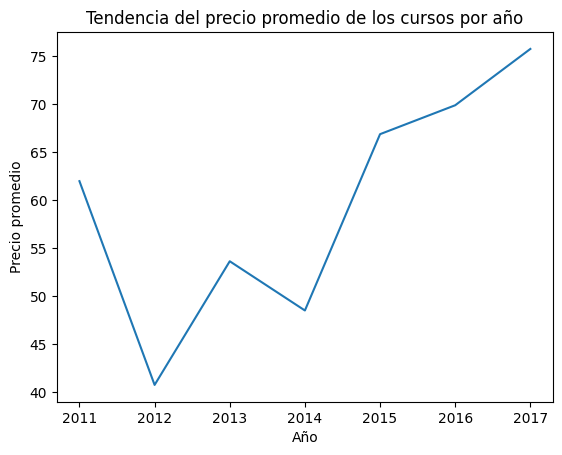

In [635]:
# Visualizar el cambio del precio promedio de los cursos por año en una gráfica de líneas
average_price_per_year.plot(kind='line')
plt.title('Tendencia del precio promedio de los cursos por año')
plt.xlabel('Año')
plt.ylabel('Precio promedio')
plt.show()

    Resultado: A partir de la visualización de la gráfica, podemos ver que el precio promedio de los cursos en Udemy ha variado bastante a lo largo de los años, y hay varias explicaciones posibles para esto.

    1. Demanda del mercado y valor percibido: La disminución inicial en el precio promedio podría deberse a una mayor competencia en el espacio de los cursos en línea o a un esfuerzo por hacer que los cursos sean más accesibles a un público más amplio. A medida que aumenta la demanda y se incrementa la percepción del valor de la educación en línea, es posible que Udemy haya podido aumentar el precio promedio de los cursos.

    2. Evolución de los contenidos de los cursos: A medida que el tiempo ha pasado, es posible que los cursos se hayan vuelto más sofisticados, con contenidos de mayor calidad, tutores más expertos o más recursos disponibles. Esto podría justificar un aumento en el precio promedio.

    3. Cambio de estrategia: También podría ser el resultado de un cambio estratégico por parte de Udemy. Quizás en los primeros años se centraron en atraer a los usuarios con precios bajos y luego, una vez que habían construido una base de usuarios sólida, se sintieron capaces de aumentar los precios.

---

In [636]:
df_udemy['content_duration'].values

array([ 1.5, 39. ,  2.5, ...,  3.5,  3. ,  2. ])

# 17. Redondear las columnas 'content_duration' y 'rating'

In [637]:
df_udemy['content_duration'] = df_udemy['content_duration'].astype(str).str.replace(',', '.')

In [638]:
df_udemy['content_duration'] = df_udemy['content_duration'].astype(float)
df_udemy['rating'] = df_udemy['rating'].astype(float)

In [639]:
df_udemy['content_duration'] = df_udemy['content_duration'].round(2)
df_udemy['rating'] = df_udemy['rating'].round(2)

---

# 18. Guardar los datos y exportarlos a un archivo csv

In [640]:
df_udemy.to_csv('../data/udemy_final.csv', index=False)

---

In [641]:
df_udemy.head(30)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating,year_published
0,1070968,Ultimate Investment Banking Course,Pago,200,2147,23,51,All Levels,1.50,2017-01-18,Business Finance,English,3.60,2017
1,1113822,Complete GST Course & Certification - Grow You...,Pago,75,2792,923,274,All Levels,39.00,2017-03-09,Business Finance,English,4.50,2017
2,1006314,Financial Modeling for Business Analysts and C...,Pago,45,2174,74,51,Intermediate Level,2.50,2016-12-19,Business Finance,English,4.20,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,Pago,95,2451,11,36,All Levels,3.00,2017-05-30,Business Finance,English,4.50,2017
4,1011058,How To Maximize Your Profits Trading Options,Pago,200,1276,45,26,Intermediate Level,2.00,2016-12-13,Business Finance,English,4.80,2016
5,192870,Trading Penny Stocks: A Guide for All Levels I...,Pago,150,9221,138,25,All Levels,3.00,2014-05-02,Business Finance,English,4.23,2014
6,739964,Investing And Trading For Beginners: Mastering...,Pago,65,1540,178,26,Beginner Level,1.00,2016-02-21,Business Finance,English,4.50,2016
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",Pago,95,2917,148,23,All Levels,2.50,2015-01-30,Business Finance,English,4.80,2015
8,476268,Options Trading 3 : Advanced Stock Profit and ...,Pago,195,5172,34,38,Expert Level,2.50,2015-05-28,Business Finance,English,4.23,2015
9,1167710,The Only Investment Strategy You Need For Your...,Pago,200,827,14,15,All Levels,1.00,2017-04-18,Business Finance,English,3.70,2017
